<div class="alert alert-block alert-success">
<b>BAN210-Predictive Analytics: K-Means Clustering</b><br/>
Author : Plesco, Felix <br/>
Date   : Mar 25, 2022
</div>

### Import all the necessary libraries

In [1]:
#importing all the necessary libraries

#import and set OMP first before using numpy
#as a workaround to memory leak warning 
import os
os.environ["OMP_NUM_THREADS"] = "1" 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

# import IRIS sample data 
iris=datasets.load_iris()
iris=pd.DataFrame(data=iris.data, columns=iris.feature_names)


### Exporting the IRIS sample data into a csv file for use later

In [2]:
#exporting the csv file for use later
#although it can also be read directly, but i like it this way
df=pd.DataFrame(iris)
df.to_csv("iris.csv")


### Import the local IRIS dataset with pandas

In [3]:
#importing the local iris dataset with pandas
ds=pd.read_csv('iris.csv')
x=ds.iloc[:, [1, 2, 3, 4]].values


### K-means clustering on the Iris - a sample dataset from SKLearn package

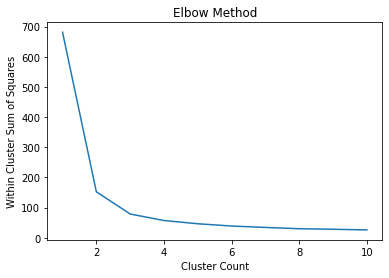

In [4]:
#Seach for the optimum number of clusters for KMeans classification
from sklearn.cluster import KMeans
wcss=[]

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plot a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method') #use elbow method
plt.xlabel('Cluster Count')
plt.ylabel('Within Cluster Sum of Squares') #within cluster sum of squares
plt.show()


### Create K-Means classifier to the sample dataset 

In [5]:
#Create K-Means classifier to the sample datase
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)


### Plot visualised  clusters, cluster centroids, and chart legend

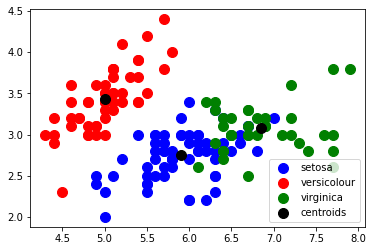

In [6]:
#Plot visualised  clusters
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, color='blue', label='setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, color='red', label='versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, color='green', label='virginica')

#Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, color='black', label='centroids')

#show chart legend
plt.legend()
